In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in avocado

In [2]:
df = pd.read_csv('../resources/avocado.csv')
df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 13)

Rename for easier access

In [4]:
df.columns = ('date', 'avgPrice', 'totalVolume', 'smallHass', 'largeHass', 'xlHass', 'totalBags', 'smallBags', 'largeBags', 'xlBags', 'type', 'year', 'region')

In [5]:
df[abs(df['totalVolume'] - df['smallHass'] - df['largeHass'] - df['xlHass']) < 10].shape[0]

26

Cannot assume that total volume is the sum of small, large and xl

In [6]:
len(df['date'].unique())

169

In [7]:
df['date'].unique()

array(['27/12/2015', '20/12/2015', '13/12/2015', '6/12/2015',
       '29/11/2015', '22/11/2015', '15/11/2015', '8/11/2015', '1/11/2015',
       '25/10/2015', '18/10/2015', '11/10/2015', '4/10/2015',
       '27/09/2015', '20/09/2015', '13/09/2015', '6/9/2015', '30/08/2015',
       '23/08/2015', '16/08/2015', '9/8/2015', '2/8/2015', '26/07/2015',
       '19/07/2015', '12/7/2015', '5/7/2015', '28/06/2015', '21/06/2015',
       '14/06/2015', '7/6/2015', '31/05/2015', '24/05/2015', '17/05/2015',
       '10/5/2015', '3/5/2015', '26/04/2015', '19/04/2015', '12/4/2015',
       '5/4/2015', '29/03/2015', '22/03/2015', '15/03/2015', '8/3/2015',
       '1/3/2015', '22/02/2015', '15/02/2015', '8/2/2015', '1/2/2015',
       '25/01/2015', '18/01/2015', '11/1/2015', '4/1/2015', '25/12/2016',
       '18/12/2016', '11/12/2016', '4/12/2016', '27/11/2016',
       '20/11/2016', '13/11/2016', '6/11/2016', '30/10/2016',
       '23/10/2016', '16/10/2016', '9/10/2016', '2/10/2016', '25/09/2016',
       '18/09/

169 dates in the form DD/MM/YYYY

In [8]:
df['year'].unique()

array([2015, 2016, 2017, 2018])

Four years of data

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['date'].head()

0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-06-12
4   2015-11-29
Name: date, dtype: datetime64[ns]

Change date to YYYY-MM-DD

In [11]:
df[['avgPrice', 'totalVolume', 'smallHass', 'largeHass', 'xlHass', 'totalBags', 'smallBags', 'largeBags', 'xlBags']].describe()

,avgPrice,totalVolume,smallHass,largeHass,xlHass,totalBags,smallBags,largeBags,xlBags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


.44 is really cheap and 3.25 is really expensive, but the avgPrice first to third quartiles are in the low to mid 1 dollar range.  
I think the totalVolume by region could be misleading if I don't take into account the region's population.  
It would be interesting to look at the share of small, large and xl for each region. We could use the volume or bags for this.  

In [12]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

Does each region have information on both types?

In [13]:
df[['type', 'region']][df['type'] == 'conventional'].groupby('region').count()

,type
region,
Albany,169
Atlanta,169
BaltimoreWashington,169
Boise,169
Boston,169
BuffaloRochester,169
California,169
Charlotte,169
Chicago,169


169 observations of conventional avocado sales for each region

In [14]:
df[['type', 'region']][df['type'] == 'organic'].groupby('region').count()

,type
region,
Albany,169
Atlanta,169
BaltimoreWashington,169
Boise,169
Boston,169
BuffaloRochester,169
California,169
Charlotte,169
Chicago,169


169 observations of organic prices for each region, except WestTexNewMexico with 166

In [15]:
df[['avgPrice', 'totalVolume', 'smallHass', 'largeHass', 'xlHass', 'totalBags', 'smallBags', 'largeBags', 'xlBags', 'type']].groupby('type').mean()

,avgPrice,totalVolume,smallHass,largeHass,xlHass,totalBags,smallBags,largeBags,xlBags
type,,,,,,,,,
conventional,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065
organic,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164


Definitely fewer organic than conventional avocados being sold

Ratio of organic to conventional avgPrice by region

In [16]:
df_avgPrice = df[['avgPrice', 'region']][df['type'] == 'organic'].groupby('region').mean() / df[['avgPrice', 'region']][df['type'] == 'conventional'].groupby('region').mean()
df_avgPrice.columns = ['avgPriceRatio']
df_avgPrice.sort_values(by = 'avgPriceRatio', ascending = False)

,avgPriceRatio
region,
PhoenixTucson,2.362802
WestTexNewMexico,2.005456
LasVegas,1.726503
SanDiego,1.634372
Spokane,1.590721
HartfordSpringfield,1.583207
West,1.582953
SanFrancisco,1.582670
DallasFtWorth,1.565047


In Phoenix and WestTex organic is twice the cost of conventional! In Pittsburgh, Syracuse, Rochester they're very close.  
Those cities are not places that I would have guessed, in fact I would have guessed that southern states would have lower ratios because of greater ease of access to supplies.  
But this ratio does not reflect the amount of the prices.

In [17]:
df_avgPrice = df_avgPrice.merge(df[['avgPrice', 'region', 'type']][df['type'] == 'conventional'].groupby('region').mean(), how = 'outer', left_index = True, right_index = True)
df_avgPrice = df_avgPrice.merge(df[['avgPrice', 'region', 'type']][df['type'] == 'organic'].groupby('region').mean(), how = 'outer', left_index = True, right_index = True)
df_avgPrice.columns = ['avgPriceRatio', 'avgPriceConv', 'avgPriceOrg']
df_avgPrice.sort_values(by = ['avgPriceRatio'], ascending = False)

,avgPriceRatio,avgPriceConv,avgPriceOrg
region,,,
PhoenixTucson,2.362802,0.728225,1.720651
WestTexNewMexico,2.005456,0.842130,1.688855
LasVegas,1.726503,1.012959,1.748876
SanDiego,1.634372,1.061479,1.734852
Spokane,1.590721,1.115976,1.775207
HartfordSpringfield,1.583207,1.408047,2.229231
West,1.582953,0.985089,1.559349
SanFrancisco,1.582670,1.397160,2.211243
DallasFtWorth,1.565047,0.846450,1.324734


In [18]:
df_avgPrice.sort_values(by = ['avgPriceRatio']).head()

,avgPriceRatio,avgPriceConv,avgPriceOrg
region,,,
Pittsburgh,1.181775,1.250651,1.477988
Syracuse,1.192372,1.386923,1.653728
BuffaloRochester,1.194641,1.382308,1.651361
GreatLakes,1.265095,1.181893,1.495207
Denver,1.269311,1.073964,1.363195


In [19]:
df_avgPrice.sort_values(by = ['avgPriceRatio'], ascending = False).head()

,avgPriceRatio,avgPriceConv,avgPriceOrg
region,,,
PhoenixTucson,2.362802,0.728225,1.720651
WestTexNewMexico,2.005456,0.842130,1.688855
LasVegas,1.726503,1.012959,1.748876
SanDiego,1.634372,1.061479,1.734852
Spokane,1.590721,1.115976,1.775207


The regions with the lowest ratio have middling avocado prices, I had thought that maybe the prices would be higher.  
Regions with the highest ratios, Phoenix and WestTex, have very low conventional prices and organic prices not much higher than those in the low ratio regions.

In [20]:
df_avgPrice.sort_values(by = ['avgPriceConv']).head()

,avgPriceRatio,avgPriceConv,avgPriceOrg
region,,,
PhoenixTucson,2.362802,0.728225,1.720651
Houston,1.540161,0.825089,1.270769
WestTexNewMexico,2.005456,0.842130,1.688855
DallasFtWorth,1.565047,0.846450,1.324734
SouthCentral,1.533315,0.869408,1.333077


In [21]:
df_avgPrice.sort_values(by = ['avgPriceConv'], ascending = False).head()

,avgPriceRatio,avgPriceConv,avgPriceOrg
region,,,
HartfordSpringfield,1.583207,1.408047,2.229231
NewYork,1.464213,1.402130,2.053018
SanFrancisco,1.582670,1.397160,2.211243
Philadelphia,1.337740,1.396331,1.867929
Syracuse,1.192372,1.386923,1.653728


As observed before, the high ratio regions have low conventional prices, but there are also regions with middling ratios among the top five. Houston, Dallas and SouthCentral have quite low organic prices, too. As I would have guessed these low price regions are in the south.  
High prices are all within a couple of cents of 1.40 and are urban areas not in the south. Except for Syracuse these regions have very high organic prices, but have conventional prices such that they have ratios in line with the low conventional price regions.

In [22]:
df_avgPrice.sort_values(by = ['avgPriceOrg']).head()

,avgPriceRatio,avgPriceConv,avgPriceOrg
region,,,
Houston,1.540161,0.825089,1.270769
DallasFtWorth,1.565047,0.846450,1.324734
SouthCentral,1.533315,0.869408,1.333077
Denver,1.269311,1.073964,1.363195
Roanoke,1.277169,1.096036,1.399822


In [23]:
df_avgPrice.sort_values(by = ['avgPriceOrg'], ascending = False).head()

,avgPriceRatio,avgPriceConv,avgPriceOrg
region,,,
HartfordSpringfield,1.583207,1.408047,2.229231
SanFrancisco,1.582670,1.397160,2.211243
NewYork,1.464213,1.402130,2.053018
Sacramento,1.545704,1.273964,1.969172
Charlotte,1.519096,1.275089,1.936982


Low organic prices seem to follow low conventional prices, but not necessarily low ratios. Denver and Roanoke have low conventional, but not extremely so, and thus have very low ratios.  
The highest organic prices all belong to regions with middling ratios and high conventional prices.

Text(0,0.5,'Region Index')

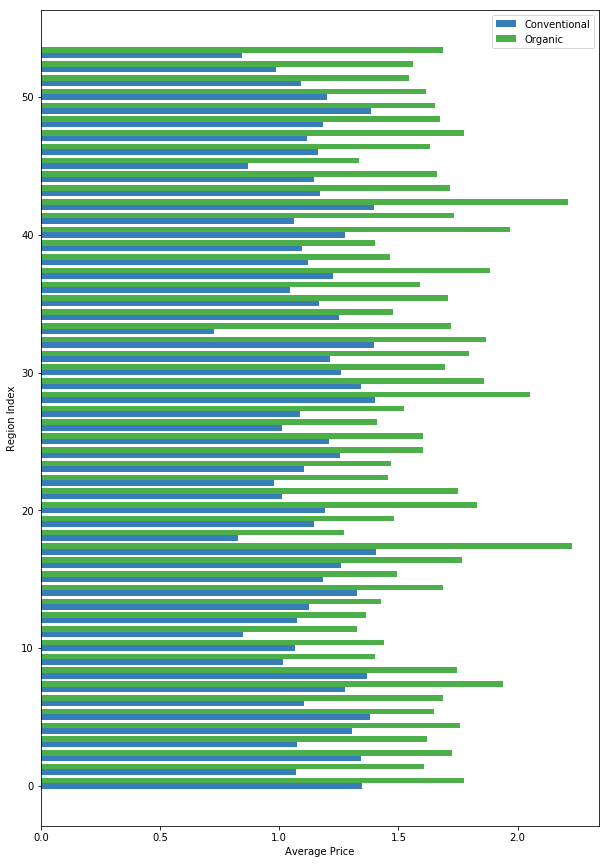

In [24]:
fig = plt.figure(figsize = (10, 15))
axs = plt.subplot(1, 1, 1)
N = df_avgPrice.shape[0] # Number of regions
ind = np.arange(N) # Indices for bars
width = 0.4 # Bar width

p1 = axs.barh(ind, df_avgPrice['avgPriceConv'], width, color = '#377eb8')
p2 = axs.barh(ind + width, df_avgPrice['avgPriceOrg'], width, color = '#4daf4a')

axs.legend((p1[0], p2[0]), ('Conventional', 'Organic'))
axs.xaxis.set_label_text('Average Price')
axs.yaxis.set_label_text('Region Index')

Text(0.5,0,'Average Price')

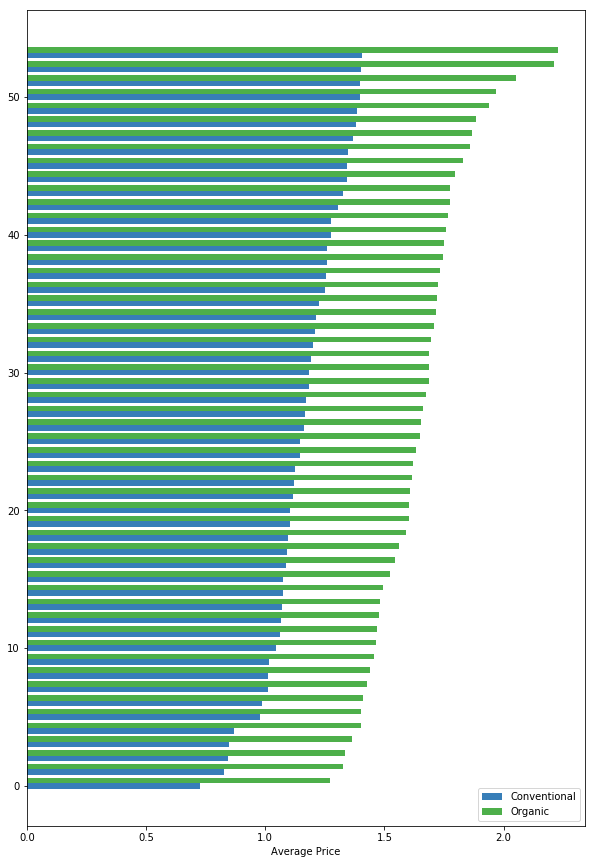

In [25]:
fig = plt.figure(figsize = (10, 15))
axs = plt.subplot(1, 1, 1)
N = df_avgPrice.shape[0] # Number of regions
ind = np.arange(N) # Indices for bars
width = 0.4 # Bar width

p1 = axs.barh(ind, df_avgPrice['avgPriceConv'].sort_values(), width, color = '#377eb8')
p2 = axs.barh(ind + width, df_avgPrice['avgPriceOrg'].sort_values(), width, color = '#4daf4a')

axs.legend((p1[0], p2[0]), ('Conventional', 'Organic'))
axs.xaxis.set_label_text('Average Price')

Lower conventional prices are associated with lower organic prices.  
Apart from a few outliers at both ends, the ratio of prices seems relatively stable, or is the absolute difference more stable?  
There is also a bit of a jump from a price of about .8 to close to 1., I would guess this is a marketing thing with grocers avoiding the .9-95 region arbitrarily.

In [26]:
df_avgPriceDif = df[['avgPrice', 'region']][df['type'] == 'organic'].groupby('region').mean() - df[['avgPrice', 'region']][df['type'] == 'conventional'].groupby('region').mean()
df_avgPriceDif.columns = ['difference']
df_avgPriceDif.head()

,difference
region,
Albany,0.424556
Atlanta,0.538284
BaltimoreWashington,0.380059
Boise,0.544201
Boston,0.453018


In [27]:
df_avgPrice = df_avgPrice.merge(df_avgPriceDif, how = 'outer', left_index = True, right_index = True)

In [28]:
df_avgPrice.head()

,avgPriceRatio,avgPriceConv,avgPriceOrg,difference
region,,,,
Albany,1.314776,1.348757,1.773314,0.424556
Atlanta,1.503626,1.068817,1.607101,0.538284
BaltimoreWashington,1.282740,1.344201,1.724260,0.380059
Boise,1.505746,1.076036,1.620237,0.544201
Boston,1.347305,1.304379,1.757396,0.453018


In [29]:
df_avgPrice['difference'].mean()

0.4959704762508284

In [30]:
df_avgPrice.sort_values(by = ['difference']).head()

,avgPriceRatio,avgPriceConv,avgPriceOrg,difference
region,,,,
Pittsburgh,1.181775,1.250651,1.477988,0.227337
Syracuse,1.192372,1.386923,1.653728,0.266805
BuffaloRochester,1.194641,1.382308,1.651361,0.269053
Denver,1.269311,1.073964,1.363195,0.289231
Roanoke,1.277169,1.096036,1.399822,0.303787


In [31]:
df_avgPrice.sort_values(by = ['difference'], ascending = False)[:10]

,avgPriceRatio,avgPriceConv,avgPriceOrg,difference
region,,,,
PhoenixTucson,2.362802,0.728225,1.720651,0.992426
WestTexNewMexico,2.005456,0.842130,1.688855,0.846725
HartfordSpringfield,1.583207,1.408047,2.229231,0.821183
SanFrancisco,1.582670,1.397160,2.211243,0.814083
LasVegas,1.726503,1.012959,1.748876,0.735917
Sacramento,1.545704,1.273964,1.969172,0.695207
SanDiego,1.634372,1.061479,1.734852,0.673373
Charlotte,1.519096,1.275089,1.936982,0.661893
Spokane,1.590721,1.115976,1.775207,0.659231


The low difference regions have low to middling prices.  
High difference regions have low to middling conventional prices, but are not all southern.

In [32]:
df_convVolume = df[['region', 'totalVolume']][df['type'] == 'conventional'].groupby('region').mean()
df_orgVolume = df[['region', 'totalVolume']][df['type'] == 'organic'].groupby('region').mean()

In [33]:
df_avgPrice = df_avgPrice.merge(df_convVolume, how = 'outer', left_index = True, right_index = True)

In [34]:
df_avgPrice = df_avgPrice.merge(df_orgVolume, how = 'outer', left_index = True, right_index = True)

In [35]:
df_avgPrice.head()

,avgPriceRatio,avgPriceConv,avgPriceOrg,difference,totalVolume_x,totalVolume_y
region,,,,,,
Albany,1.314776,1.348757,1.773314,0.424556,92903.026450,2172.713018
Atlanta,1.503626,1.068817,1.607101,0.538284,512789.298817,11501.345266
BaltimoreWashington,1.282740,1.344201,1.724260,0.380059,773642.458166,23481.324793
Boise,1.505746,1.076036,1.620237,0.544201,82843.434911,2441.699704
Boston,1.347305,1.304379,1.757396,0.453018,561541.054083,14044.654970


In [36]:
df_avgPrice.columns = ['avgPriceRatio', 'avgPriceConv', 'avgPriceOrg', 'difference', 'totVolConv', 'totVolOrg']

In [37]:
df_avgPrice['region'] = df_avgPrice.index

In [38]:
df_avgPrice.head()

,avgPriceRatio,avgPriceConv,avgPriceOrg,difference,totVolConv,totVolOrg,region
region,,,,,,,
Albany,1.314776,1.348757,1.773314,0.424556,92903.026450,2172.713018,Albany
Atlanta,1.503626,1.068817,1.607101,0.538284,512789.298817,11501.345266,Atlanta
BaltimoreWashington,1.282740,1.344201,1.724260,0.380059,773642.458166,23481.324793,BaltimoreWashington
Boise,1.505746,1.076036,1.620237,0.544201,82843.434911,2441.699704,Boise
Boston,1.347305,1.304379,1.757396,0.453018,561541.054083,14044.654970,Boston


In [42]:
df_avgPrice[df_avgPrice['region'] == 'TotalUS']

,avgPriceRatio,avgPriceConv,avgPriceOrg,difference,totVolConv,totVolOrg,region
region,,,,,,,
TotalUS,1.415768,1.092012,1.546036,0.454024,3.373504e+07,967565.653491,TotalUS


In [45]:
df_avgPrice = df_avgPrice.drop(['TotalUS'])

In [46]:
df_avgPrice.to_csv('../resources/avgPrice.csv', index=False)

In [40]:
df.columns

Index(['date', 'avgPrice', 'totalVolume', 'smallHass', 'largeHass', 'xlHass',
       'totalBags', 'smallBags', 'largeBags', 'xlBags', 'type', 'year',
       'region'],
      dtype='object')